# 3.1 Convolutional AutoEncoder | Latent Vector | MNIST

Reference: https://www.youtube.com/watch?v=P2lYhhCZ0Vg

## Input libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# TensorFlow
import tensorflow as tf

from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense

In [3]:
# Keras
from keras.datasets import mnist

In [4]:
# Other Libraries
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Check if GPU is available
devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(devices))

Num GPUs Available:  1


### Load Dataset

In [6]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train.shape

(60000, 28, 28)

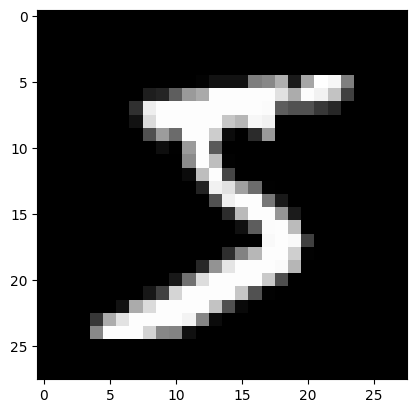

In [7]:
# Visualize one image
plt.imshow(X_train[0], cmap='gray')

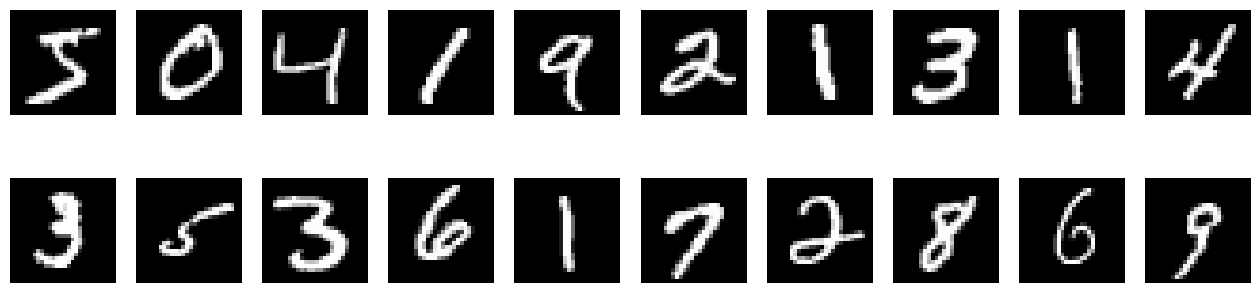

In [8]:
fig, axes = plt.subplots(2, 10, figsize=(16, 4))

count = 0

for i in range(2):
    for j in range(10):
        axes[i, j].imshow(X_train[count], cmap='gray')
        axes[i, j].axis('off')
        count += 1

### Preprocess the data

In [9]:
X_train[0].shape[0]

28

In [10]:
X_train.shape[0]

60000

In [11]:
28*28

784

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

x_train contains 60000 images of 28x28 pixels each. Now, we need to flatten the images into vectors of 28x28 = 784 pixels each. The result is that x_train will be a matrix of 6000 x 784 (28*28). We will repeat the same for x_test 10000 x 784 (28*28).

In [14]:
X_test[0].shape[1]

28

Normalize the data dividing the dataset by the max number, in this case 255.

In [15]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

Check if the values are between 0 and 1.

In [16]:
X_train.max()

1.0

In [17]:
X_train.shape[0]

60000

In [18]:
X_train.shape[1]

28

### Add noise to the data

In [19]:
noise_factor = 0.1
X_train_noise = X_train + noise_factor*np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noise = X_test + noise_factor*np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

In [20]:
X_train_noise.shape

(60000, 28, 28)

In [21]:
X_test_noise.shape

(10000, 28, 28)

### Visualize noisy images

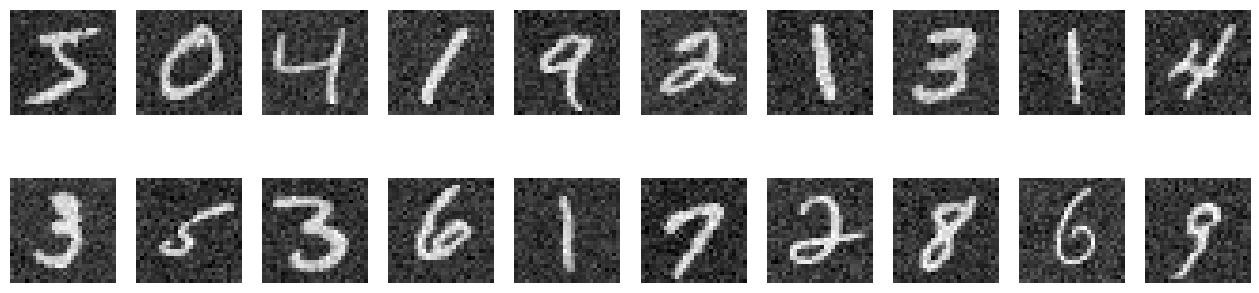

In [22]:
fig, axes = plt.subplots(2, 10, figsize=(16, 4))

count = 0

for i in range(2):
    for j in range(10):
        axes[i, j].imshow(X_train_noise[count], cmap='gray')
        axes[i, j].axis('off')
        count += 1

### Reshape the dataset

In [23]:
# Convert 2D image into 1D vector
X_train = X_train.reshape(X_train.shape[0], X_train[0].shape[0], X_train[0].shape[1], 1)
X_train.shape

(60000, 28, 28, 1)

In [24]:
X_test = X_test.reshape(X_test.shape[0], X_test[0].shape[1], X_test[0].shape[1], 1)
X_test.shape

(10000, 28, 28, 1)

In [25]:
# Convert 2D image into 1D vector
X_train_noise = X_train_noise.reshape(X_train_noise.shape[0], X_train_noise[0].shape[0], X_train_noise[0].shape[1], 1)
X_train_noise.shape

(60000, 28, 28, 1)

In [26]:
X_test_noise = X_test_noise.reshape(X_test_noise.shape[0], X_test_noise[0].shape[1], X_test_noise[0].shape[1], 1)
X_test_noise.shape

(10000, 28, 28, 1)

## Model

In [27]:
latent_vec_dim_list = [2, 8, 16, 32, 64, 128]

In [28]:
X_train.shape[1]

28

In [29]:
input_dim = (X_train.shape[1], X_train.shape[2]) #28, 28
input_dim

(28, 28)

In [30]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))

# Normalize data
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

313/313 [==============================] - 1s 2ms/step
			Latent_vec_dim = 2


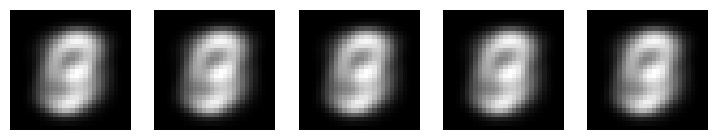

KeyboardInterrupt: 

In [31]:
latent_vec_dim_list = [2, 8, 16, 32, 64, 128]

for i in latent_vec_dim_list:
  input_dim = 28*28
  latent_vec_dim = i

  input_layer = Input(shape=(input_dim,))

  # Define the autoencoder architecture
  # First build the encoder
  enc_layer_1 = Dense(latent_vec_dim, activation='tanh')(input_layer)
  encoder = enc_layer_1

  # Then build the decoder
  dec_layer_1 = Dense(input_dim, activation='sigmoid')(encoder)
  decoder = dec_layer_1

  # Connect both encoder and decoder
  autoencoder = Model(input_layer, decoder)

  # Latent representation (Optional)
  latent_model = Model(input_layer, encoder)

  # Compile the autoencoder model
  autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

  # Train the autoencoder with MNIST data
  history = autoencoder.fit(train_images, train_images, epochs=70, batch_size=128,
                            shuffle=True, validation_data=(test_images, test_images),
                            verbose=0)
  
  # Testing the model by reconstructing
  reconstructed_images = autoencoder.predict(test_images)

  print("\t\t\tLatent_vec_dim =", i)
  n = 5
  plt.figure(figsize=(9, 2))
  for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(reconstructed_images[i].reshape(28, 28), cmap="gray")
    ax.axis('off')

  plt.show()
  print()
  tf.keras.backend.clear_session()

print("\t\t\t     Original")
n = 5
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

In [ ]:
from keras.models import Model, Input
from keras.layers import Input, Conv2D, MaxPool2D, UpSampling2D, Dense, BatchNormalization
from keras.callbacks import ModelCheckpoint

In [ ]:
# Encoder Input Layer
encoder_input = Input(shape=X_train.shape[1:]) #28, 28, 1
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoder_input) # (6000, 28, 28, 32)
x = BatchNormalization()(x)
x = MaxPool2D((2, 2), padding='same')(x) # (6000, 14, 14, 32)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x) # (6000, 14, 14, 32)
x = BatchNormalization()(x)
encoded = MaxPool2D((2, 2), padding='same')(x) # (6000, 7, 7, 32)

In [ ]:
# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded) # (6000, 7, 7, 32)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x) # (6000, 14, 14, 32)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x) # (6000, 14, 14, 32)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x) # (6000, 28, 28, 32)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x) # (6000, 28, 28, 1)

In [ ]:
# Connect Layers intop the Model
autoencoder = Model(encoder_input, decoded, name = 'Denoising_Autoencoder')
autoencoder.summary()

In [ ]:
# Compile the model using MSE loss and Adam Optimizer
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

#### Train Model

In [ ]:
# Fit training data to the model
checkpoint = ModelCheckpoint('../models/MNIST/DAE_MNIST_best_model.h5', verbose=1, save_best_only=True, save_weights_only=False)
history = autoencoder.fit(X_train_noise, X_train, epochs=50, batch_size=128,  callbacks= checkpoint, validation_split = 0.25, verbose = 2)

In [ ]:
# Plot the training loss  and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

#### Load BEST Model

In [ ]:
from keras.models import load_model

autoencoder = load_model('../models/MNIST/DAE_MNIST_best_model.h5')
autoencoder.summary()

#### Visualize Data

In [ ]:
def visualize_data(data):
    data = data.reshape(data.shape[0], data.shape[1], data.shape[2])
    count = 0
    fig, axes = plt.subplots(2, 10, figsize=(16, 4))
    for i in range(2):
        for j in range(10):
            axes[i, j].imshow(data[count], cmap='gray')
            axes[i, j].axis('off')
            count += 1

In [ ]:
visualize_data(X_test_noise[:20])

In [ ]:
# Predict on test noisy data
pred = autoencoder.predict(X_test_noise[:20])
pred.shape

In [ ]:
visualize_data(pred)